In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")


In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# shape of dataset
df.shape

(8807, 12)

In [4]:
# column names & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# summary statistics
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [7]:
# Movies vs TV Shows count
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [8]:
# Top 10 countries producing content
df['country'].value_counts().head(10)

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


In [9]:
# Most common ratings
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


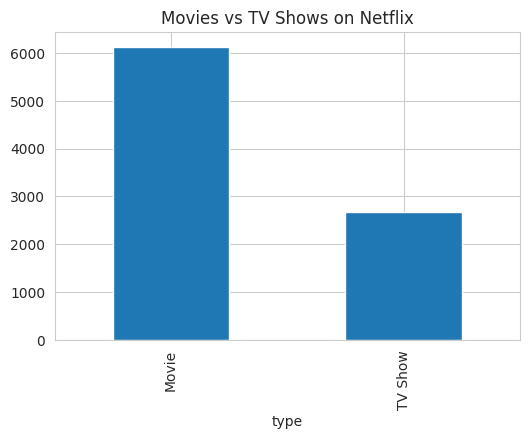

In [10]:
df['type'].value_counts().plot(
    kind='bar',
    title='Movies vs TV Shows on Netflix',
    figsize=(6,4)
)
plt.show()

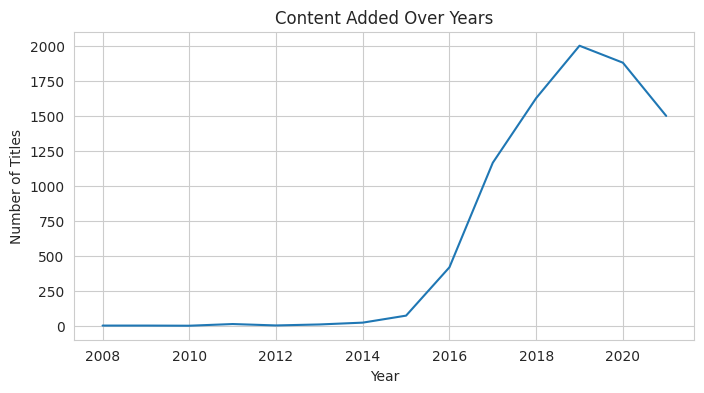

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year


df['year_added'].value_counts().sort_index().plot(
    kind='line',
    title='Content Added Over Years',
    figsize=(8,4)
)

plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()



In [13]:
df['date_added'].isna().sum()


np.int64(98)

In [18]:
df_clean = df.copy()

In [19]:
df_clean['director'] = df_clean['director'].fillna('Unknown')

In [20]:
df_clean['cast'] = df_clean['cast'].fillna('Not Available')

In [21]:
df_clean['country'] = df_clean['country'].fillna('Unknown')

In [22]:
df_clean['rating'] = df_clean['rating'].fillna(df_clean['rating'].mode()[0])

In [23]:
df_clean['duration'] = df_clean['duration'].fillna('Unknown')

In [24]:
df_clean['duration_value'] = df_clean['duration'].str.extract('(\d+)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1544565260.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_clean['duration_value'] = df_clean['duration'].str.extract('(\d+)').astype(float)


In [25]:
df_clean['content_type'] = df_clean['type']

In [26]:
df_clean['primary_genre'] = df_clean['listed_in'].str.split(',').str[0]

In [27]:
df_clean['primary_country'] = df_clean['country'].str.split(',').str[0]

In [28]:
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month

In [29]:
df_clean.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,98
release_year,0
rating,0
duration,0


**🚀 STEP 3: Advanced EDA & KPI Analysis**

In [38]:
#KPI 1 — Movies vs TV Shows
df_clean['content_type'].value_counts()

,count
content_type,
Movie,6131
TV Show,2676


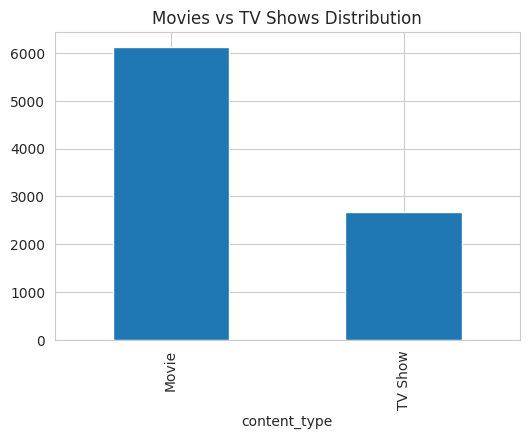

In [39]:
df_clean['content_type'].value_counts().plot(
    kind='bar',
    title='Movies vs TV Shows Distribution',
    figsize=(6,4)
)
plt.show()

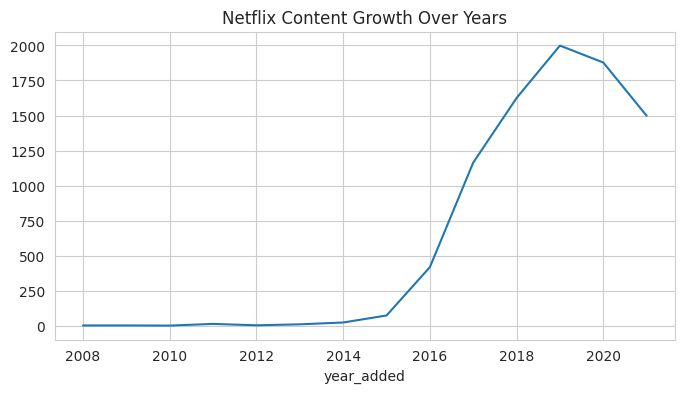

In [32]:
#KPI 2 — Content Growth Over Years
df_clean['year_added'].value_counts().sort_index().plot(
    kind='line',
    title='Netflix Content Growth Over Years',
    figsize=(8,4)
)
plt.show()

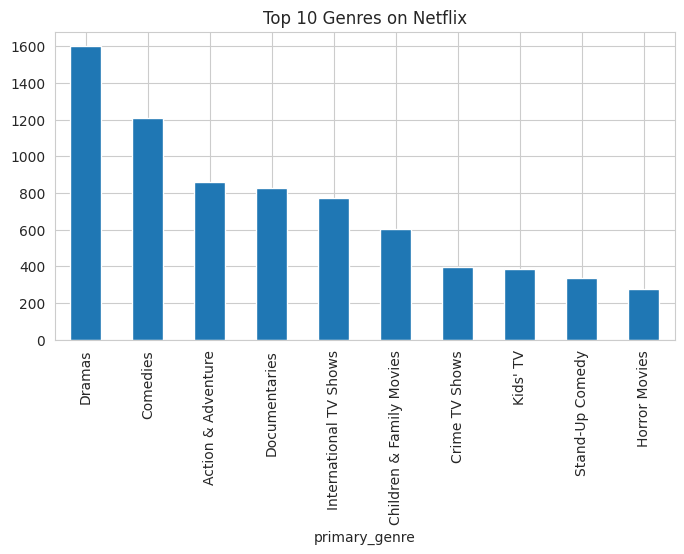

In [33]:
#KPI 3 — Top 10 Genres
df_clean['primary_genre'].value_counts().head(10).plot(
    kind='bar',
    title='Top 10 Genres on Netflix',
    figsize=(8,4)
)
plt.show()

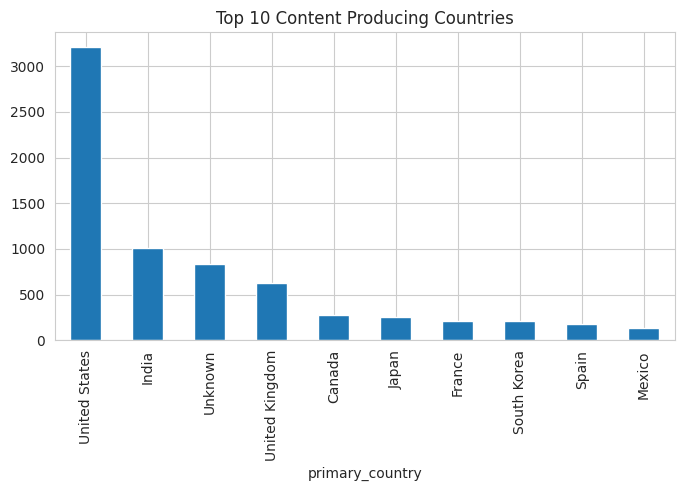

In [34]:
#KPI 4 — Top 10 Content Producing Countries
df_clean['primary_country'].value_counts().head(10).plot(
    kind='bar',
    title='Top 10 Content Producing Countries',
    figsize=(8,4)
)
plt.show()

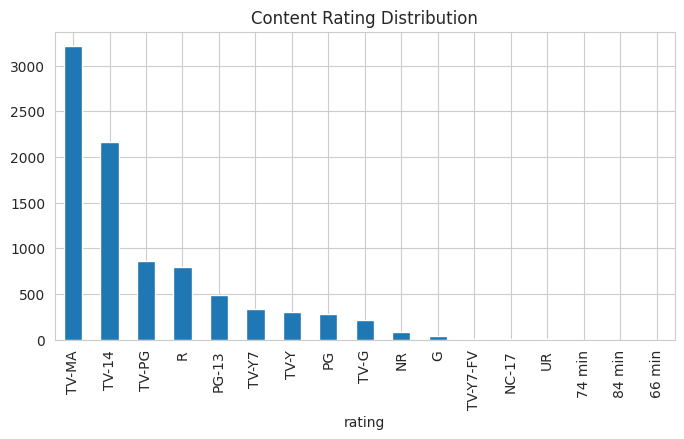

In [41]:
#Rating Distribution
df_clean['rating'].value_counts().plot(
    kind='bar',
    title='Content Rating Distribution',
    figsize=(8,4)
)
plt.show()


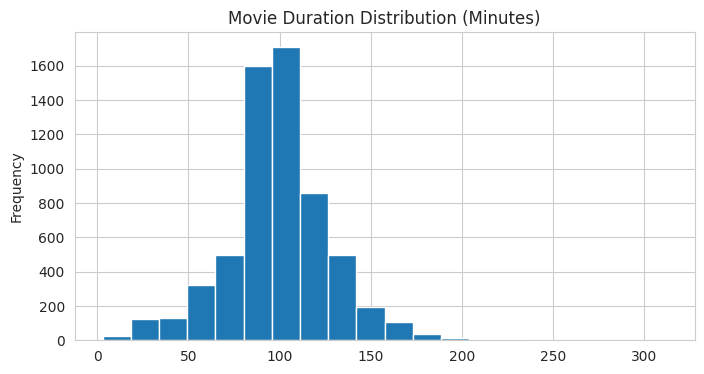

In [42]:
#KPI 6 — Movie Duration Analysis
movies = df_clean[df_clean['content_type'] == 'Movie']

movies['duration_value'].dropna().plot(
    kind='hist',
    bins=20,
    title='Movie Duration Distribution (Minutes)',
    figsize=(8,4)
)
plt.show()

**🚀 STEP 4: SQL Analysis**

In [45]:
import sqlite3

In [46]:
# Create SQLite database
conn = sqlite3.connect('netflix_ott.db')

# Load dataframe into SQL table
df_clean.to_sql('netflix_content', conn, if_exists='replace', index=False)

print("Table created successfully!")

Table created successfully!


In [47]:
pd.read_sql("SELECT * FROM netflix_content LIMIT 5;", conn)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_value,content_type,primary_genre,primary_country,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,90.0,Movie,Documentaries,United States,9.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,2.0,TV Show,International TV Shows,South Africa,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,1.0,TV Show,Crime TV Shows,Unknown,9.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,1.0,TV Show,Docuseries,Unknown,9.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,2.0,TV Show,International TV Shows,India,9.0


In [48]:
#KPI 1 — Total Content Count
pd.read_sql("""
SELECT COUNT(*) AS total_content
FROM netflix_content;
""", conn)

,total_content
0,8807


In [49]:
#KPI 2 — Movies vs TV Shows
pd.read_sql("""
SELECT content_type, COUNT(*) AS count
FROM netflix_content
GROUP BY content_type;
""", conn)

,content_type,count
0,Movie,6131
1,TV Show,2676


In [50]:
#KPI 3 — Content Growth by Year
pd.read_sql("""
SELECT year_added, COUNT(*) AS content_count
FROM netflix_content
WHERE year_added IS NOT NULL
GROUP BY year_added
ORDER BY year_added;
""", conn)

,year_added,content_count
0,2008.0,2
1,2009.0,2
2,2010.0,1
3,2011.0,13
4,2012.0,3
5,2013.0,10
6,2014.0,23
7,2015.0,73
8,2016.0,418
9,2017.0,1164


In [52]:
#KPI 4 — Top 10 Genres
pd.read_sql("""
SELECT primary_genre, COUNT(*) AS genre_count
FROM netflix_content
GROUP BY primary_genre
ORDER BY genre_count DESC
LIMIT 10;
""", conn)

,primary_genre,genre_count
0,Dramas,1600
1,Comedies,1210
2,Action & Adventure,859
3,Documentaries,829
4,International TV Shows,774
5,Children & Family Movies,605
6,Crime TV Shows,399
7,Kids' TV,388
8,Stand-Up Comedy,334
9,Horror Movies,275


In [53]:
#KPI 5 — Top 10 Content Producing Countries
pd.read_sql("""
SELECT primary_country, COUNT(*) AS country_count
FROM netflix_content
GROUP BY primary_country
ORDER BY country_count DESC
LIMIT 10;
""", conn)

,primary_country,country_count
0,United States,3211
1,India,1008
2,Unknown,831
3,United Kingdom,628
4,Canada,271
5,Japan,259
6,France,212
7,South Korea,211
8,Spain,181
9,Mexico,134


In [54]:
#KPI 6 — Rating Distribution
pd.read_sql("""
SELECT rating, COUNT(*) AS rating_count
FROM netflix_content
GROUP BY rating
ORDER BY rating_count DESC;
""", conn)

,rating,rating_count
0,TV-MA,3211
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


In [55]:
#KPI 7 — Average Movie Duration
pd.read_sql("""
SELECT ROUND(AVG(duration_value), 2) AS avg_movie_duration
FROM netflix_content
WHERE content_type = 'Movie'
AND duration_value IS NOT NULL;
""", conn)

,avg_movie_duration
0,99.58


In [56]:
#KPI 8 — Top Years for Content Release
pd.read_sql("""
SELECT release_year, COUNT(*) AS release_count
FROM netflix_content
GROUP BY release_year
ORDER BY release_count DESC
LIMIT 10;
""", conn)

,release_year,release_count
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
5,2021,592
6,2015,560
7,2014,352
8,2013,288
9,2012,237


**🚀 STEP 4 (Python Only): KPI Analysis using Pandas**

In [62]:
#KPI 1 — Total Content Count
total_content = df_clean.shape[0]
total_content

8807

In [63]:
#KPI 2 — Movies vs TV Shows Count
df_clean['content_type'].value_counts()

,count
content_type,
Movie,6131
TV Show,2676


In [64]:
#KPI 3 — Content Growth by Year
df_clean.groupby('year_added').size().dropna()

,0
year_added,
2008.0,2
2009.0,2
2010.0,1
2011.0,13
2012.0,3
2013.0,10
2014.0,23
2015.0,73
2016.0,418


In [65]:
#KPI 4 — Top 10 Genres
df_clean['primary_genre'].value_counts().head(10)

,count
primary_genre,
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
International TV Shows,774
Children & Family Movies,605
Crime TV Shows,399
Kids' TV,388
Stand-Up Comedy,334


In [66]:
#KPI 5 — Top 10 Content Producing Countries
df_clean['primary_country'].value_counts().head(10)

,count
primary_country,
United States,3211
India,1008
Unknown,831
United Kingdom,628
Canada,271
Japan,259
France,212
South Korea,211
Spain,181


In [67]:
#KPI 6 — Rating Distribution
df_clean['rating'].value_counts()

,count
rating,
TV-MA,3211
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [70]:
#KPI 7 — Average Movie Duration (Minutes)
df_clean[df_clean['content_type'] == 'Movie']['duration_value'].mean()
round(df_clean[df_clean['content_type'] == 'Movie']['duration_value'].mean(), 2)


np.float64(99.58)

In [71]:
#KPI 8 — Top 10 Release Years
df_clean['release_year'].value_counts().head(10)

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
2021,592
2015,560
2014,352
2013,288


In [72]:
df_clean.to_csv("netflix_cleaned_data.csv", index=False)

In [73]:
from google.colab import files
files.download("netflix_cleaned_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>